In [35]:
from pymongo import MongoClient
import pandas as pd
import numpy as np
import ast
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [24]:
healthy = pd.read_csv('data/twitter_mongo/healthy_clean.csv',index_col='Unnamed: 0')

healthy['sentiment']=healthy['sentiment'].apply(ast.literal_eval)

healthy['comp']=healthy['sentiment'].apply(lambda x: x['compound'])

sub_healthy = healthy[['keyword','text','lat','long','census','comp']]

In [28]:
unhealthy = pd.read_csv('data/twitter_mongo/unhealthy_clean.csv',index_col='Unnamed: 0')

unhealthy['sentiment']=unhealthy['sentiment'].apply(ast.literal_eval)

unhealthy['comp']=unhealthy['sentiment'].apply(lambda x: x['compound'])

sub_unhealthy = unhealthy[['keyword','text','lat','long','census','comp']]

In [29]:
grocery = pd.read_csv("data/twitter_mongo/grocery_stores_clean.csv",index_col='Unnamed: 0')

grocery['sentiment']=grocery['sentiment'].apply(ast.literal_eval)

grocery['comp']=grocery['sentiment'].apply(lambda x: x['compound'])

sub_grocery = grocery[['keyword','text','lat','long','census','comp']]

In [30]:
fastfood = pd.read_csv("data/twitter_mongo/ff_stores_clean.csv",index_col='Unnamed: 0')

fastfood['sentiment']=fastfood['sentiment'].apply(ast.literal_eval)

fastfood['comp']=fastfood['sentiment'].apply(lambda x: x['compound'])

sub_fastfood = fastfood[['keyword','text','lat','long','census','comp']]

In [34]:
sub_healthy.to_csv("data/map_data/healthy_map.csv")
sub_unhealthy.to_csv("data/map_data/unhealthy_map.csv")
sub_grocery.to_csv("data/map_data/grocery_map.csv")
sub_fastfood.to_csv("data/map_data/fastfood_map.csv")

In [36]:
sub_healthy.head()

,keyword,text,lat,long,census,comp
0,almond,"Almond cake , mango and raspberry compote , le...",25.754059,-80.260989,12086006206,0.0000
1,almond,Bucatini with Faux Meat Sauce and Garlic Bread...,38.892000,-77.231100,51059460600,-0.1531
2,almond,"Even though I can't work out right now, I can ...",42.317600,-88.446200,17111870903,0.5093
3,almond,NEW:: SMOKED ALMOND BUTTERSCOTCH // WILLIAMSBU...,40.718210,-73.963850,36047055500,0.4889
4,almond,Matcha &amp; strawberry almond swirl w/ berrie...,32.767466,-117.166015,6073008902,0.4926


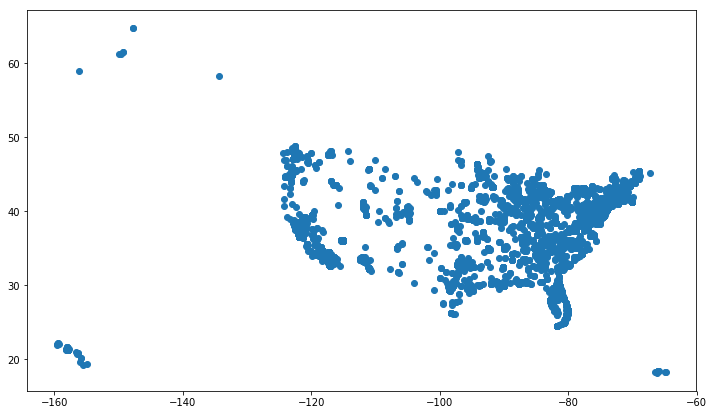

In [37]:
fig,ax = plt.subplots(1,1,figsize=(12,7))
ax.scatter(sub_healthy['long'],sub_healthy['lat'])

In [38]:
us_dat = sub_healthy[(sub_healthy['long']>-130)&(sub_healthy['lat']>25)]

In [158]:
us_col = np.where(us_dat['keyword']=="mcdonald's", 'b', 'g')

In [159]:
us_dat[us_col=='y'].shape

(0, 8)

NameError: name 'us_col' is not defined

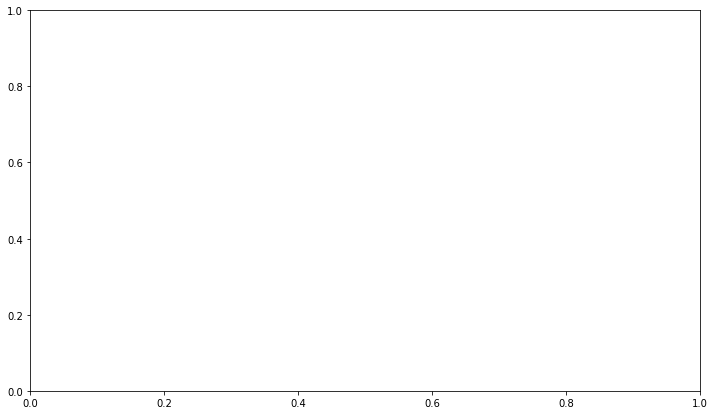

In [39]:
fig,ax = plt.subplots(1,1,figsize=(12,7))
ax.scatter(us_dat['long'],us_dat['lat'])

In [142]:
us_dat[['lat','long']].head()

,lat,long
675,33.877187,-118.217950
983,41.883599,-87.625809
1073,31.700183,-106.339426
2286,42.007151,-87.690466
2436,36.036300,-95.783600


In [143]:
#clean emojis and remove url
def clean_text(inputString):
    final = ""
    for letter in inputString:
        try:
         letter.encode("ascii")
         final += letter
        except UnicodeEncodeError:
         final += ''
    return re.sub(r"http\S+", "", final)

In [144]:
mini_df = us_dat[['lat','long']]

In [145]:
mini_df['clean_col'] = us_dat['text'].apply(clean_text)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [164]:
#census = []
for coords in mini_df[['lat','long']][900:].values:
    census.append(get_census(coords))

In [165]:
len(census)

1326

In [166]:
mini_df['census']=census

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [168]:
mini_df.shape

(1326, 4)

In [169]:
mini_df.to_csv('map_df.csv')

In [ ]:
census = pd.read_csv()

In [82]:
eng_dat = c_dat[np.array([i['lang'] for i in x])=='en']
len(eng_dat)

2633

In [83]:
eng_dat[['long','lat']].values[0:20]

array([[  25.39172985,   49.56133054],
       [  13.72313059,  100.52966555],
       [   7.09828312,  125.61483004],
       [  29.30173478,   47.90301974],
       [  29.24638668,   47.93582448],
       [   1.51162819,  110.30455948],
       [   3.0263725 ,  101.58160812],
       [  29.30173478,   47.90301974],
       [  14.650921  ,  -90.500191  ],
       [  13.62483062,  123.18585802],
       [  33.877187  , -118.21795   ],
       [ -19.85450013,  -43.96093369],
       [   1.35305036,  103.94496541],
       [   3.11939302,  101.59284034],
       [  41.8835986 ,  -87.6258091 ],
       [  22.249334  ,  114.148634  ],
       [   1.54365134,  103.76262077],
       [  31.70018254, -106.33942634],
       [  14.62378522,  121.00773681],
       [  29.31394979,   48.00429673]])

In [84]:
def get_census(coords):
    url='https://geo.fcc.gov/api/census/area?lat={}&lon={}&format=json'.format(coords[0],coords[1])
    res = requests.get(url)
    if res.json()['results']==[]:
        return None
    else:
        return res.json()['results'][0]['block_fips'][:-4]


census = []
for coords in us_dat[['long','lat']].values[:20]:
    census.append(get_census(coords))

In [85]:
census

['06037543202',
 '17031320100',
 '48141003901',
 '17031020302',
 '40143007503',
 '48201251000',
 '37051003201',
 '37025040703',
 '13051010809',
 '40009966800',
 '34029713500',
 '12011041200',
 '48453001100',
 '37051003201',
 '18033020300',
 '51117930800',
 '06073009603',
 '06073009603',
 '06071009500',
 '06037701902']

In [23]:
sub_eng = eng_dat[(eng_dat['lat']>-130) & (eng_dat['lat']<-25) & (eng_dat['long']>0)]
len(sub_eng)

1677

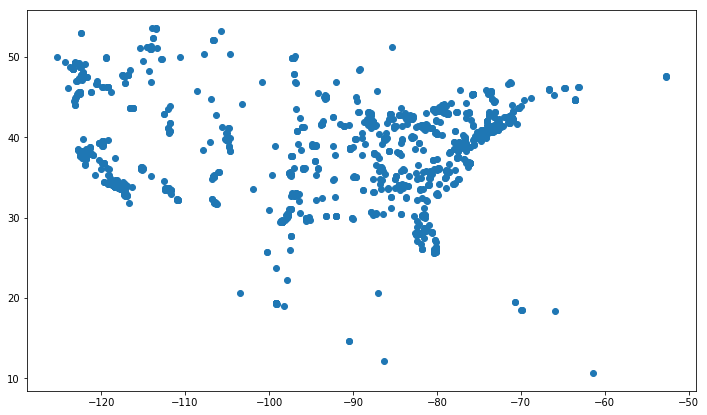

In [24]:
fig,ax = plt.subplots(1,1,figsize=(12,7))
ax.scatter(sub_eng['lat'],sub_eng['long'])

In [73]:
us_dat['text'].iloc[:20]

675     Waiting on our dinner.  At least it's not McDo...
983     I'm at McDonald's in Chicago, IL https://t.co/...
1073    #Chichan #Tone 2 #mood\n#Valle #Poser #Fake #d...
2286    Here for a late lunch! (@ McDonald's in Chicag...
2436    McDonald's, it ain't .. 👌 👍 #cigar #botl @eigh...
3711    I'm at McDonald's in Kingwood, TX https://t.co...
4057    Happy birthday silas_benny 🎂 🎈 #breakfastsquad...
5839    I'm at McDonald's in Kannapolis, NC https://t....
5919    Uncle @ochocinco meal plan. (@ McDonald's in S...
5948    Time to roll...#truckerjackie #5hrjunkie #5hou...
6297    I'm at McDonald's - @mcdnytristate in Brick, N...
6337    Bra i got to stop drinking 😂😂💀👀‼️ sound like a...
6782    Good morning, fatigue, I remember you fondly. ...
7221    JB, struggling this morning? Don’t miss breakf...
7448    I'm at McDonald's - @mcd_northernind in Butler...
7467    Tea time (@ McDonald's in Clarksville, VA) htt...
8857    @prosperitygirl1 Black girl magic. @ Starbucks...
8879    This d

In [77]:
result = us_dat['text'].apply(lambda x: re.sub(r"http\S+", "", x))

In [78]:
result

675       Waiting on our dinner.  At least it's not McDo...
983                       I'm at McDonald's in Chicago, IL 
1073      #Chichan #Tone 2 #mood\n#Valle #Poser #Fake #d...
2286      Here for a late lunch! (@ McDonald's in Chicag...
2436      McDonald's, it ain't .. 👌 👍 #cigar #botl @eigh...
3711                     I'm at McDonald's in Kingwood, TX 
4057      Happy birthday silas_benny 🎂 🎈 #breakfastsquad...
5839                  I'm at McDonald's in Kannapolis, NC  
5919      Uncle @ochocinco meal plan. (@ McDonald's in S...
5948      Time to roll...#truckerjackie #5hrjunkie #5hou...
6297       I'm at McDonald's - @mcdnytristate in Brick, NJ 
6337      Bra i got to stop drinking 😂😂💀👀‼️ sound like a...
6782      Good morning, fatigue, I remember you fondly. ...
7221      JB, struggling this morning? Don’t miss breakf...
7448      I'm at McDonald's - @mcd_northernind in Butler...
7467           Tea time (@ McDonald's in Clarksville, VA)  
8857        @prosperitygirl1 Black girl 

In [94]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores('hi you are awesome👌 👍')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [46]:
def deEmojify(inputString):
    returnString = ""
    for character in inputString:
        try:
         character.encode("ascii")
         returnString += character
        except UnicodeEncodeError:
         returnString += ''
    return returnString

In [57]:
deEmojify('what upstop drinking 😂😂💀👀‼️ soa i got to stop drinking ‼️ sound like a big.')

'what upstop drinking  soa i got to stop drinking  sound like a big.'

In [58]:
RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)

def strip_emoji(text):
    return RE_EMOJI.sub(r'', text)

strip_emoji('what up🙄🤔hellstop drinking 😂😂💀👀‼️ soo')

'what uphellstop drinking ‼️ soo'

In [55]:
res = us_dat['text'].apply(lambda x: deEmojify(x))

In [56]:
res

675     Waiting on our dinner.  At least it's not McDo...
983     I'm at McDonald's in Chicago, IL https://t.co/...
1073    #Chichan #Tone 2 #mood\n#Valle #Poser #Fake #d...
2286    Here for a late lunch! (@ McDonald's in Chicag...
2436    McDonald's, it ain't ..   #cigar #botl @eighty...
3711    I'm at McDonald's in Kingwood, TX https://t.co...
4057    Happy birthday silas_benny   #breakfastsquad @...
Name: text, dtype: object

In [54]:
us_dat['sentiment'].values

array([{'neg': 0.181, 'neu': 0.819, 'pos': 0.0, 'compound': -0.4356},
       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
       {'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.4767},
       {'neg': 0.0, 'neu': 0.65, 'pos': 0.35, 'compound': 0.4995},
       {'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'compound': 0.5719}],
      dtype=object)

In [123]:
import preprocessor as p

def preprocessing_text(text):
    '''
    INPUT: str
    OUTPUT: str w/ emojies, urls, hashtags and mentions removed
    '''
    p.set_options(p.OPT.EMOJI, p.OPT.URL)
    clean_text = p.clean(text)
    
    return clean_text 

In [147]:
#clean emojis and remove url
def clean_text(inputString):
    final = ""
    for letter in inputString:
        try:
         letter.encode("ascii")
         final += letter
        except UnicodeEncodeError:
         final += ''
    return re.sub(r"http\S+", "", final)

In [148]:
us_dat['text'][:20]

675     Waiting on our dinner.  At least it's not McDo...
983     I'm at McDonald's in Chicago, IL https://t.co/...
1073    #Chichan #Tone 2 #mood\n#Valle #Poser #Fake #d...
2286    Here for a late lunch! (@ McDonald's in Chicag...
2436    McDonald's, it ain't .. 👌 👍 #cigar #botl @eigh...
3711    I'm at McDonald's in Kingwood, TX https://t.co...
4057    Happy birthday silas_benny 🎂 🎈 #breakfastsquad...
5839    I'm at McDonald's in Kannapolis, NC https://t....
5919    Uncle @ochocinco meal plan. (@ McDonald's in S...
5948    Time to roll...#truckerjackie #5hrjunkie #5hou...
6297    I'm at McDonald's - @mcdnytristate in Brick, N...
6337    Bra i got to stop drinking 😂😂💀👀‼️ sound like a...
6782    Good morning, fatigue, I remember you fondly. ...
7221    JB, struggling this morning? Don’t miss breakf...
7448    I'm at McDonald's - @mcd_northernind in Butler...
7467    Tea time (@ McDonald's in Clarksville, VA) htt...
8857    @prosperitygirl1 Black girl magic. @ Starbucks...
8879    This d

In [149]:
res = us_dat['text'][:20].apply(lambda x: clean_text(x))

In [150]:
res.values

array(["Waiting on our dinner.  At least it's not McDonald's. LOL @ El Pollo Loco ",
       "I'm at McDonald's in Chicago, IL ",
       "#Chichan #Tone 2 #mood\n#Valle #Poser #Fake #dassadhuh #chola #cholarealness #chologram @ McDonald's ",
       "Here for a late lunch! (@ McDonald's in Chicago, IL) ",
       "McDonald's, it ain't ..   #cigar #botl @eighty5cigars @ochocinco @ Broken Arrow, Oklahoma ",
       "I'm at McDonald's in Kingwood, TX ",
       "Happy birthday silas_benny   #breakfastsquad @ McDonald's ",
       "I'm at McDonald's in Kannapolis, NC  ",
       "Uncle @ochocinco meal plan. (@ McDonald's in Savannah, GA) ",
       "Time to roll...#truckerjackie #5hrjunkie #5hourenergy #backto100percent #mochafrappe #alreadygone #phoenix bound @ McDonald's ",
       "I'm at McDonald's - @mcdnytristate in Brick, NJ ",
       "Bra i got to stop drinking  sound like a big ass jit @ McDonald's ",
       "Good morning, fatigue, I remember you fondly. We bathed in the grease on the McDo